<a href="https://colab.research.google.com/github/ekateee/define-a-category/blob/main/define_category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3


##Библиотеки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymorphy2 transliterate fastparquet

     |████████████████████████████████| 61kB 3.1MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 
     |████████████████████████████████| 122kB 8.1MB/s 
     |████████████████████████████████| 8.2MB 6.8MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
  Created wheel for fastparquet: filename=fastparquet-0.5.0-cp37-cp37m-linux_x86_64.whl size=213362 sha256=57f7e34448b937257d69f4c4008b42c92a50fa6a7e0dd4e99c20b27119942484
  Stored in directory: /root/.cache/pip/wheels/97/0e/da/e2122965947ab2bfbc20e31a968e998fc8932f7fcb0ed78ad0
  Created wheel for thrift: filename=thrift-0.13.0-cp37-cp37m-linux_x86_64.whl size=348133 sha256=a5a0d49fc15fd0699f3c29dd2d6dfcde39fac866e5d68d66f65edd40814d5a26
  Stored in directory: /root/.cache/pip/wheels/02/a2/46/689ccfcf40155c23edc7cdbd9de488611c8fdf49ff34b1706e
Successfully built fastparquet thrift


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 7.3MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=48b35bf8dcda56f7224adecbced2b620576cde6d6b3cec6543e62589d85c95f0
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_ru')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_ru to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_ru.zip.


True

In [ ]:
!pip install sklearn

In [ ]:
pip install -U tmtoolkit

Requirement already up-to-date: tmtoolkit in /usr/local/lib/python3.7/dist-packages (0.10.0)


In [ ]:
pip install matplotlib==3.1.3

In [ ]:
import numpy as np
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import string
import pymorphy2
import itertools
import matplotlib.pyplot as plt
import csv
from gensim.models import LdaModel
from gensim.models import Phrases
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from transliterate import translit, get_available_language_codes
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import statistics
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF
import pyLDAvis.gensim
import gensim

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


##Соединение datasets

###Чтение с файлов

In [ ]:
news_3=[]
with open('/content/drive/MyDrive/NLP/Lab3/dataset_3.json','r') as file:
  for line in file:
    news_3.append(json.loads(line[:-1]))
df_3 = pd.DataFrame(news_3)

In [ ]:
news_1=[]
with open('/content/drive/MyDrive/NLP/Lab3/dataset_1.json','r') as file:
  for line in file:
    news_1.append(json.loads(line[:-1]))
df_1 = pd.DataFrame(news_1)

In [ ]:
df_2 = pd.read_json('/content/drive/MyDrive/NLP/Lab3/dataset_2.json', typ = 'frame')
news_2 = []
for line in df_2["catalog"]:
    news_2.append(line)
df_2 = pd.DataFrame(news_2)

###Отображение данных

Действия для отображения данных в одном виде:
1. Переименование столбцов второго датасета и перевод категорий на русский язык
2. Переименование категорий первого датасета в строковый вид
3. Удаление столбеца data  во втором датасете

Проверка на пустоту в строчках и отображение количества данных в каждом датасете.

In [ ]:
df_2 = df_2.rename({'url': 'link'}, axis=1) 
mapping_2 = {'incidents': 'происшествия','economy': 'экономика', 'society': 'общество','politics': 'политика'}
mapping_1 = { 'Спорт':'спорт', "Технологии": "технологии","Экономика":"экономика","В России":"Россия"}
df_2['category'] = df_2['category'].map(mapping_2)
df_1['category'] = df_1['category'].map(mapping_1)
df_2 = df_2.drop('date', axis = 1)

In [ ]:
for i , text in enumerate(df_2["text"]):
  len_1 = len("Радио Sputnik")
  position_1 = text.find("Радио Sputnik")
  if position_1 != -1:
    df_2["text"][i] = text[position_1+len_1:]

  len_2 = len("РИА Новости")
  position_2 = text.find("РИА Новости") 
  if position_2 != -1:
    df_2["text"][i] = text[position_2+len_2:]

  position_3 = text.find("Радио Sputnik – самая цитируемая радиостанция России")
  if position_3 != -1:
    df_2["text"][i] = text[:position_3]
  position_4 = text.find("Будьте с нами в Telegram и Яндекс Дзен")
  if position_4 != -1:
    df_2["text"][i] = text[:position_4]
  position_5 = text.find("Подписывайтесь на наш канал в Яндекс.Дзен и присоединяйтесь к нашему Telegram-каналу")
  if position_5 != -1:
    df_2["text"][i] = text[:position_5]

In [ ]:
print(df_1.info())
print(df_2.info())
print(df_3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4610 entries, 0 to 4609
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   link      4610 non-null   object
 1   title     4610 non-null   object
 2   category  4610 non-null   object
 3   tags      4610 non-null   object
 4   text      4610 non-null   object
dtypes: object(5)
memory usage: 180.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4056 entries, 0 to 4055
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   link      4056 non-null   object
 1   category  4056 non-null   object
 2   title     4056 non-null   object
 3   text      4056 non-null   object
 4   tags      4056 non-null   object
dtypes: object(5)
memory usage: 158.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4742 entries, 0 to 4741
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    ---

In [ ]:
category_1 = df_1['category'].value_counts().reset_index()
category_1.columns = ['category', 'count']
category_2 = df_2['category'].value_counts().reset_index()
category_2.columns = ['category', 'count']
category_3 = df_3['category'].value_counts().reset_index()
category_3.columns = ['category', 'count']
print(category_1)
print()
print(category_2)
print()
print(category_3)

     category  count
0       спорт   1226
1  технологии   1212
2      Россия   1121
3   экономика   1051

       category  count
0  происшествия   1018
1     экономика   1018
2      общество   1011
3      политика   1009

       category  count
0         спорт   1211
1    технологии   1200
2          авто   1200
3  недвижимость   1131


Пустых строк в данных нет. 

Датасеты имеют примерно одинаковое количество текстов по каждой из категории.

###Отображение данных в соединенном датасетс

Действия в данном пункте:
1. Соединие таблиц
2. Удаление повторяющихся текстов



In [ ]:
df = pd.concat((df_1,df_2,df_3), ignore_index = True, axis = 0)

In [ ]:
print("Количество текстов ", len(df['text']))
print("Количество уникальных текстов ",len(df['text'].unique()))

Количество текстов  13408
Количество уникальных текстов  13281


In [ ]:
df = df.drop_duplicates(subset=['link'],keep=False)
df = df.drop_duplicates(subset=['text'],keep=False)

In [ ]:
df.shape

(13157, 5)

In [ ]:
df = df.dropna()

In [ ]:
df

,link,title,category,tags,text
0,https://www.newsru.com/finance/05Jun2019/idiot...,Автор идеи об изъятии сверхдоходов у бизнеса п...,экономика,"[Экономика, Правительство России, Проекты]",В августе 2018 года помощник президента РФ Анд...
1,https://www.newsru.com/finance/03Aug2020/cypru...,Россия разрывает соглашение о двойном налогооб...,экономика,"[Экономика, Налоги, Офшоры]",Минфин РФ начал расторжение соглашения о двойн...
2,https://www.newsru.com/finance/21May2020/indus...,Российская промышленность в нерабочем апреле у...,экономика,"[Экономика, Россия, Кризис]","Промышленное производство в апреле, который по..."
3,https://www.newsru.com/finance/23Mar2020/rub_d...,Неделя началась с очередного обвала цен на неф...,экономика,"[Экономика, Валюта, Рубль]","В понедельник, 23 марта, российский рынок акци..."
4,https://www.newsru.com/finance/25May2020/busin...,Недоверие бизнеса к силовикам и судам в РФ дос...,экономика,"[Экономика, Россия, Экономические преступления]",Недоверие бизнеса к российским правоохранитель...
...,...,...,...,...,...
13403,https://www.newsru.com/realty/13Jul2020/arenda...,В России состоялась крупнейшая сделка на рынке...,недвижимость,"[Россия, сделка, рекорд, аренда, складская нед...","Компания ""ВсеИнструменты.ру"" подписала соглаше..."
13404,https://www.newsru.com/realty/17Jun2020/rassel...,В Минстрое прогнозируют перевыполнение плана п...,недвижимость,"[Минстрой, Владимир Якушев, расселение аварийн...",Программа расселения граждан из аварийного жил...
13405,https://www.newsru.com/realty/27Jun2019/sergie...,"Превращение Сергиева Посада в ""русский Ватикан...",недвижимость,[],"Консалтинговое бюро ""Стрелка"" по госкомпании ..."
13406,https://www.newsru.com/realty/29Jul2020/nbki_d...,"Размер дохода россиян, позволяющий обслуживать...",недвижимость,"[НБКИ, ипотека, доход, аналитика]","Размер дохода заемщиков, комфортного для обслу..."


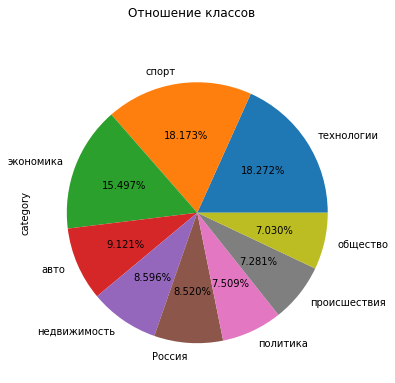

In [ ]:
plt.subplots(figsize=(6, 6))
cirle_diagrama = df["category"].value_counts().plot.pie(subplots = True, autopct = '%2.3f%%', title = "Отношение классов")

In [ ]:
category = df['category'].value_counts().reset_index()
category.columns = ['category', 'count']
print(category)

       category  count
0    технологии   2404
1         спорт   2391
2     экономика   2039
3          авто   1200
4  недвижимость   1131
5        Россия   1121
6      политика    988
7  происшествия    958
8      общество    925


Первый и третий датасет были взяты из одного источника, поэтому были удалены строки с повторяющимся текстом (осталось 13281).

Из диаграммы видно, что полученный датасет не является равноспределенным.

Для групп: спорт, технологии, экономика текстов представлено больше, чем для других, поэтому возможно эти темы будут определяться лучше остальных.


##Обработка

In [ ]:
class Handler:
    def union_cell_InText(self):
      df["tags_str"] = df["tags"].apply(lambda text: " ".join(text)) 
      df["union_cell"] =  df["title"].apply(lambda text: "".join(text))+ " " + df["tags_str"].apply(lambda text: "".join(text)) +" "+ df["text"].apply(lambda text: "".join(text))
      
    def remove_number(self, name_cell):
      df[name_cell] = df[name_cell].apply(lambda text: re.sub(r'\b\d*\b', '', text))

    def remove_punctuation(self, name_cell):
      df[name_cell] = df[name_cell].apply(lambda text: re.sub(r'[^(a-zA-Z0-9А-Яа-я)\s]', ' ', text))
      df[name_cell] = df[name_cell].apply(lambda text: re.sub(re.escape(string.punctuation), ' ', text))
      df[name_cell] = df[name_cell].apply(lambda text: re.sub(r'\(|\)', '', text))
      df[name_cell] = df[name_cell].apply(lambda text: re.sub(r'^\s+|\n|\r|\s+$', '', text))
      df[name_cell] = df[name_cell].apply(lambda text: re.sub('\ {2,}', ' ', text))

    def translation_into_ru(self, name_cell):
      df[name_cell] = df[name_cell].apply(lambda text: translit(text,'ru'))

    def lemmatization(self, name_cell):
      morph = pymorphy2.MorphAnalyzer()
      df[name_cell] = df[name_cell].apply(lambda text: list(map( lambda word: morph.parse(word)[0].normal_form, text)))

    def tokenizing(self, name_cell):
      df[name_cell] = df[name_cell].apply(lambda text: word_tokenize(text.lower(), language="russian"))

    def remove_stop_words(self, name_cell):
      df["NumOfWords"] = df["union_cell"].apply(lambda text: len(text))
      df["stop"] = df[name_cell].apply(lambda text:  [word for word in text if word in stopwords.words("russian") and len(word) <= 2])
      df["NumOfStopWords"] = df["stop"].apply(lambda text: len(text))
      df[name_cell] = df[name_cell].apply(lambda text:  [word for word in text if word not in stopwords.words("russian") and len(word) > 2] )
      df["percent"] = (df["NumOfStopWords"]/df["NumOfWords"]*100).astype(int)

    def save_parquet(self, path):
      df.to_parquet(path, engine = 'fastparquet', compression = 'gzip')

    def unique_words(self, name_cell):
      df['NumOfUniqueWords'] = df[name_cell].apply(lambda text: len(set(text)))
      df["unique_words"] = df["union_cell"].apply(lambda text: list(set(text)))


###Метод обработки текста


1. Соединяем статью, название текста и ключевые слова вместе, чтобы было больше текста
2. Удаляем лишнее:

  1. одиночные числа, не входящие в слова
  2. знаки препинания
3. Переводим английские слова на русские
4. Токенизируем по словам
5. Лематизация
6. Удалям стоп слова (делаем после лематизации,чтобы привести в начальную форму и удалить их)
7. Сохраняем результат в файл
8. Применяем биграммы и триграммы для того, чтобы расширить dataset
* Обработка для тегов и текстов

In [ ]:
articles = Handler()
articles.union_cell_InText()
articles.remove_number("union_cell")
articles.remove_punctuation("union_cell")
articles.translation_into_ru("union_cell")
articles.tokenizing("union_cell")
articles.lemmatization("union_cell")
articles.remove_stop_words("union_cell") 
articles.unique_words("union_cell")

df['tags'] = df['tags'].apply(lambda text: ' '.join(text).lower())
articles.remove_number("tags")
articles.remove_punctuation("tags")
articles.translation_into_ru("tags")
articles.tokenizing("tags")
articles.lemmatization("tags")
articles.remove_stop_words("tags") 
articles.unique_words("tags")

df.reset_index(drop=True)
path = '/content/drive/MyDrive/NLP/Lab3/Data_.parquet'
df.to_parquet(path, engine = 'fastparquet', compression = 'gzip')

In [ ]:
def ReadParquet(FName):
    return pd.read_parquet(FName, engine = 'fastparquet')
DF = ReadParquet('/content/drive/MyDrive/NLP/Lab3/Data.parquet')
DF = DF.reset_index(drop=True)

In [ ]:
text_clean= []
for text in DF["union_cell"]:
        text_clean.append(text)

from gensim.models import Phrases
bigram = Phrases(text_clean, min_count = 3)
trigram = Phrases(bigram[text_clean], min_count = 3)

for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:
          text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
          text_clean[idx].append(token)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
from gensim.corpora.dictionary import Dictionary
from numpy import array

dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below = 10 , no_above=0.4)
#Создадим словарь и корпус для lda модели
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 25127
Количество документов: 13281


##Model LDA

In [ ]:
from gensim.models import LdaModel

mas_num_topics = range(3,15, 2)
mas_coherence_lda = []


temp = dictionary[0]  
id2word = dictionary.id2token
for num_topics in mas_num_topics:

  model_lda = LdaModel(
      corpus= corpus,
      id2word=id2word,
      chunksize = 3500,
      alpha='auto',
      eta='auto',
      num_topics=num_topics
  )
  coherence_model_lda = CoherenceModel(model=model_lda, texts=text_clean, dictionary=dictionary, coherence='c_w2v')
  coherence_lda = coherence_model_lda.get_coherence()
  mas_coherence_lda.append(coherence_lda)

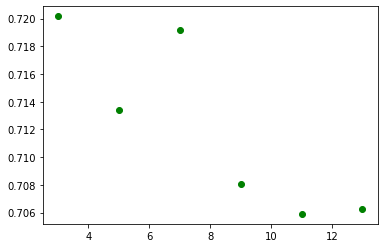

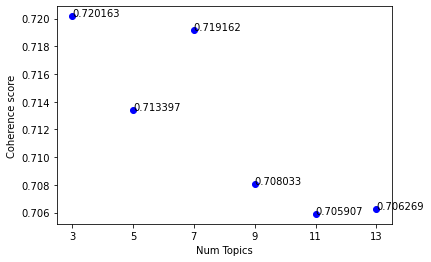

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(mas_num_topics)),  mas_coherence_lda, 'bo') 

plt.xticks(range(len(mas_num_topics)), mas_num_topics) 
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")


for i, v in enumerate(mas_coherence_lda):
    ax.text(i, v, "%f" %v, ha="left")
plt.show()

**Вывод:**
1. В пределах исследуемого промежутка (3:13) значения когерентности колеблются в пределах от 0.7 до 0.72
2. Так как в датасете задано 9 категорий, мы строим модель для 9 тем

In [ ]:
temp = dictionary[0]  
id2word = dictionary.id2token
model_lda = LdaModel(
      corpus= corpus,
      id2word=id2word,
      chunksize = 3500,
      alpha='auto',
      eta='auto',
      num_topics=9
)

In [ ]:
model_lda.save('/content/drive/MyDrive/NLP/Lab3/LDA_9.model')

In [ ]:
model_lda = gensim.models.LdaModel.load("/content/drive/MyDrive/NLP/Lab3/LDA_9.model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


In [ ]:
pyLDAvis.enable_notebook()
data = pyLDAvis.gensim.prepare(model_lda, corpus, dictionary)
print(data.topic_order)

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


[4, 1, 6, 9, 7, 8, 3, 5, 2]


In [ ]:
data

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.059084  0.016193       1        1  14.821194
0      0.036514  0.001885       2        1  14.521944
5     -0.013130 -0.131117       3        1  12.927700
8     -0.046396 -0.079558       4        1  12.138801
6     -0.080298  0.070200       5        1  11.800559
7     -0.104677  0.046365       6        1  10.655016
2      0.054820  0.023527       7        1   9.146489
4      0.073414  0.039957       8        1   7.019002
1      0.138836  0.012549       9        1   6.969295, topic_info=                 Term          Freq         Total Category  logprob  loglift
579       коронавирус  14046.000000  14046.000000  Default  30.0000  30.0000
8916            жильё   5780.000000   5780.000000  Default  29.0000  29.0000
62           компания  22605.000000  22605.000000  Default  28.0000  28.0000
9510             аппл   4288.000000   4288.000000  Default  27.0000  27.0000
12706          хуаwей   3242.000000   3242.000000  Default  26.0000  26.0000
...               ...           ...           ...      ...      ...      ...
14     владимир_путин    673.310554   5516.928083   Topic9  -6.1980   0.5603
62           компания    783.092571  22605.251226   Topic9  -6.0469  -0.6990
336            страна    703.654409   8455.836934   Topic9  -6.1539   0.1773
22                всё    682.993874   8248.362055   Topic9  -6.1837   0.1724
364              весь    674.911348  10893.402066   Topic9  -6.1956  -0.1177

[890 rows x 6 columns], token_table=       Topic      Freq             Term
term                                   
19324      1  0.051314  wорлд_атхлетицс
19324      2  0.028508  wорлд_атхлетицс
19324      3  0.028508  wорлд_атхлетицс
19324      4  0.011403  wорлд_атхлетицс
19324      5  0.011403  wорлд_атхлетицс
...      ...       ...              ...
12891      4  0.018019    яндекс_маркет
12891      5  0.005148    яндекс_маркет
12891      7  0.007723    яндекс_маркет
12891      8  0.002574    яндекс_маркет
12891      9  0.002574    яндекс_маркет

[4494 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 6, 9, 7, 8, 3, 5, 2])

Хотя когерентность не такая низкая около 0,7 для 9 тем, но есть пересекающие круги, что говорит о том, что модель может быть улучшена подбором других параметров. Хорошая тематическая модель будет иметь неперекрывающиеся большие двоичные объекты для каждой темы.


##Модель PLSA (NMF)

In [ ]:
corpus_plsa = []
for new in DF["union_cell"]:
  corpus_plsa.append(' '.join(new))
  

In [ ]:
stop_word = stopwords.words("russian")
bad_word = ['который',"этот","от",'также',"тоже","свой","таким_образ","радио_спутник","сам","такой","ранее","это"]
for i in bad_word:
  stop_word.append(i)

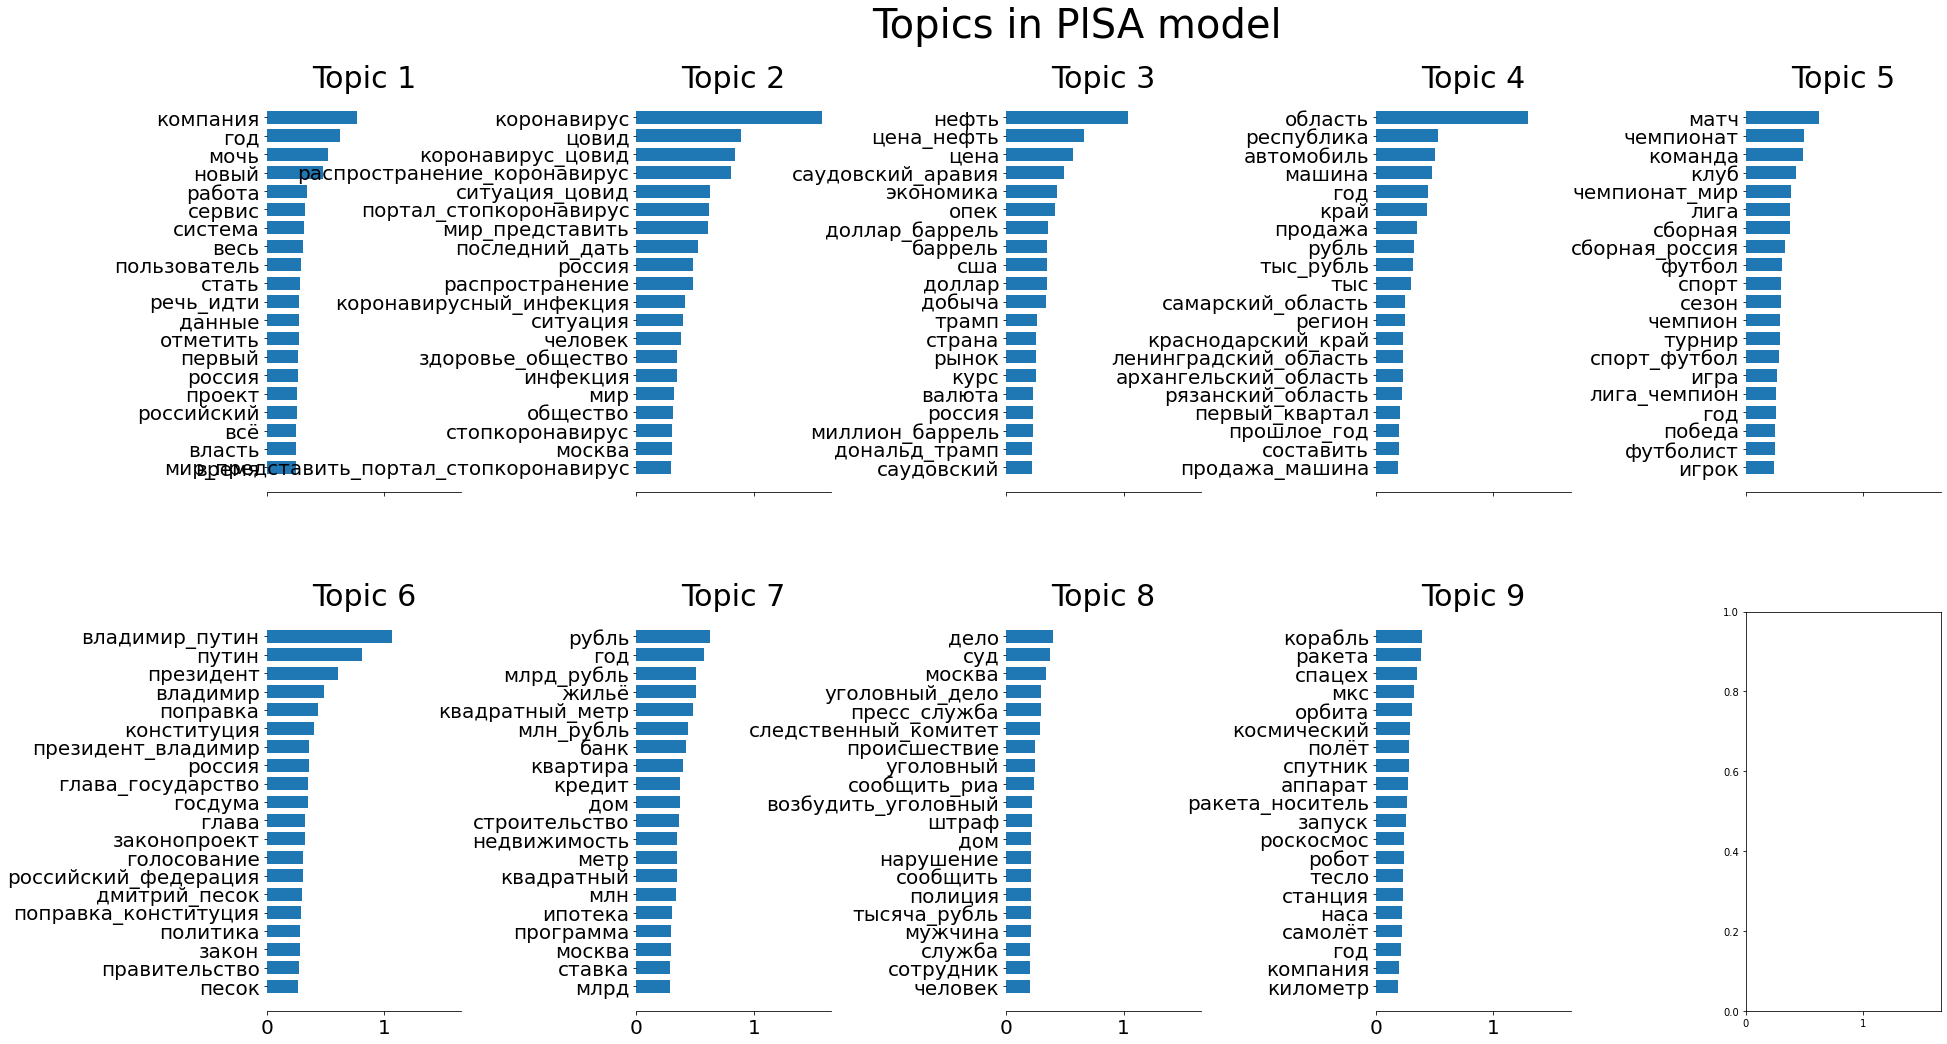

In [ ]:
n_components = 9
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2,
                                   stop_words= stop_word)

tfidf = tfidf_vectorizer.fit_transform(corpus_plsa)


PLSA = NMF(n_components=n_components, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

tfidf_feature_names = tfidf_vectorizer.get_feature_names()
plot_top_words(PLSA, tfidf_feature_names, n_top_words,
               'Topics in PlSA model')

Из топа слов в каждой теме можно точно заметить, что 3 тема - это спорт, 6 - недвижемость, 7 - происшествия, 8 - авто. 

In [ ]:
n_comp = range(3,15, 2)
coherence_plsa=[]
for  n in n_comp:
  PLSA = NMF(n_components=n, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)
  coherence_model_plsa=metric_coherence_gensim(measure='c_v', 
                        top_n=20, 
                        topic_word_distrib=PLSA.components_, 
                        dtm=tfidf,
                        vocab=np.array([x for x in tfidf_vectorizer.vocabulary_.keys()]),
                        texts=DF["union_cell"])
  coherence_plsa.append(statistics.mean(coherence_model_plsa))


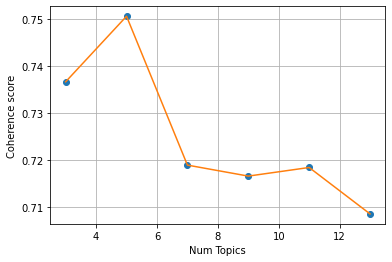

In [ ]:
plt.plot(n_comp, coherence_plsa,'o') 
plt.plot(n_comp, coherence_plsa) 
plt.grid()
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()

Для модели PLSA когерентность и её разброс больше, чем в предыдушей (колеблется от 0.7 до 0.75)

Выбрано так же 9 тем

#Word2Vec

## Получаем список тем

LDA

In [ ]:
num_topics = model_lda.num_topics
list_topics_lda = []
for term in range(num_topics):
  tmp_list = []
  for list_word in model_lda.show_topic(term):
    tmp_list.append(list_word[0])

  list_topics_lda.append(tmp_list)
print(list_topics_lda)  

[['компания', 'путин', 'президент', 'хуаwей', 'санкт_петербург', 'мочь', 'всё', 'страна', 'свой', 'глава'], ['корабль', 'матч', 'аппл', 'путин', 'мкс', 'стать', 'первый', 'команда', 'новый', 'клуб'], ['нефть', 'саудовский_аравия', 'российский', 'президент', 'мочь', 'мир', 'цена', 'заявить', 'стать', 'глава'], ['дом', 'москва', 'рубль', 'компания', 'суд', 'тыс', 'дело', 'сообщить', 'пресс_служба', 'коронавирус'], ['место', 'первый', 'чемпионат', 'российский', 'время', 'команда', 'мочь', 'свой', 'новый', 'человек'], ['компания', 'новый', 'рынок', 'рубль', 'мочь', 'цена', 'смартфон', 'продажа', 'сервис', 'система'], ['коронавирус', 'область', 'рубль', 'тыс', 'человек', 'случай', 'жильё', 'весь', 'регион', 'новый'], ['коронавирус', 'москва', 'жильё', 'мочь', 'дом', 'человек', 'цовид', 'весь', 'правительство', 'регион'], ['компания', 'млн_рубль', 'квартира', 'млн', 'рубль', 'проект', 'тыс', 'оператор', 'данные', 'мочь']]


NMF(PLSA)

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names()
list_topics_nmf = []
for topic_idx, topic in enumerate(PLSA.components_):
  top_features_ind = topic.argsort()[:-10 - 1:-1]
  top_features = [feature_names[i] for i in top_features_ind]
  list_topics_nmf.append(top_features)
print(list_topics_nmf) 

[['год', 'мочь', 'компания', 'работа', 'новый', 'система', 'весь', 'данные', 'проект', 'отметить'], ['коронавирус', 'цовид', 'коронавирус_цовид', 'распространение_коронавирус', 'ситуация_цовид', 'портал_стопкоронавирус', 'мир_представить', 'последний_дать', 'распространение', 'россия'], ['нефть', 'цена_нефть', 'цена', 'саудовский_аравия', 'опек', 'экономика', 'доллар_баррель', 'баррель', 'добыча', 'доллар'], ['область', 'республика', 'край', 'регион', 'краснодарский_край', 'самарский_область', 'архангельский_область', 'ленинградский_область', 'рязанский_область', 'мурманский_область'], ['матч', 'чемпионат', 'команда', 'клуб', 'лига', 'сборная', 'чемпионат_мир', 'сборная_россия', 'футбол', 'сезон'], ['владимир_путин', 'путин', 'президент', 'владимир', 'глава_государство', 'президент_владимир', 'дмитрий_песок', 'россия', 'песок', 'глава'], ['рубль', 'квадратный_метр', 'жильё', 'год', 'млрд_рубль', 'млн_рубль', 'квартира', 'квадратный', 'метр', 'дом'], ['суд', 'дело', 'уголовный_дело', 'с

## Обучаем модель на наших данных

In [ ]:
from gensim.models import Word2Vec
w2v_model = Word2Vec(
    min_count=5,
    window=3,
    size=300,
    negative=10,
    alpha=0.03,
    min_alpha=0.0007,
    sample=6e-5,
    sg=1)
w2v_model.build_vocab(text_clean)
w2v_model.train(text_clean, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
w2v_model.wv.save( '/content/drive/MyDrive/NLP/Lab3/' + 'W2V_OurModel.model')

In [ ]:
w2v_model = gensim.models.Word2Vec.load("/content/drive/MyDrive/NLP/Lab3/W2V_Model.model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:479: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.7/dist-packages/gensim/utils.py:488: DeprecationWarning: Call to deprecated `cum_table` (Attribute will be removed in 4.0.0, use self.vocabulary.cum_table instead).
  setattr(self, attrib, None)


In [ ]:
import statistics

Tags = DF['tags']
def get_word_from_str(str_):
  word = ''
  position = str_.index("'") + 1;
  while str_[position] !="'":
    word += str_[position]
    position += 1
  print(word)
  return word

def compare_tag_term(list_topics):
  list_similarity =[]

  for i in range(len(Tags)):
    list_tmp = []
    for term in list_topics:
      while True:
        if len(Tags[i])>0:          
          try:  
            list_tmp.append(w2v_model.wv.n_similarity(Tags[i], term) )
            similarity = w2v_model.wv.n_similarity(Tags[i], term) 
            break
          except KeyError as string:
            word = get_word_from_str(str(string))
            Tags[i].remove(word)
        else: break
    if len(list_tmp)>0:
      print('\nТег', Tags[i], '\nТема ', list_topics[np.argmax(list_tmp)], '\nСовпадение ', max(list_tmp))
      list_similarity.append(max(list_tmp))
    # print(list_similarity)
  return statistics.mean(list_similarity)

## Сравнение тега и темы

In [ ]:
mean_similarity_lda = compare_tag_term(list_topics_lda)

Выходные данные были обрезаны до нескольких последних строк (5000).

Тег ['крутье', 'умереть', 'южный', 'урал', 'хоккей'] 
Тема  ['место', 'первый', 'чемпионат', 'российский', 'время', 'команда', 'мочь', 'свой', 'новый', 'человек'] 
Совпадение  0.5222694

Тег ['мамай', 'кокорин', 'футбол', 'чемпионат', 'россия'] 
Тема  ['место', 'первый', 'чемпионат', 'российский', 'время', 'команда', 'мочь', 'свой', 'новый', 'человек'] 
Совпадение  0.5358292

Тег ['виктор', 'кашшай', 'департамент', 'судейство', 'рфс'] 
Тема  ['место', 'первый', 'чемпионат', 'российский', 'время', 'команда', 'мочь', 'свой', 'новый', 'человек'] 
Совпадение  0.4645328

Тег ['бернуть', 'экклстоун', 'формула', 'расизм'] 
Тема  ['нефть', 'саудовский_аравия', 'российский', 'президент', 'мочь', 'мир', 'цена', 'заявить', 'стать', 'глава'] 
Совпадение  0.38605455

Тег ['болельщик', 'уткин', 'спартак', 'ростов', 'футбол'] 
Тема  ['корабль', 'матч', 'аппл', 'путин', 'мкс', 'стать', 'первый', 'команда', 'новый', 'клуб'] 
Совпадени

In [ ]:
mean_similarity_nmf = compare_tag_term(list_topics_nmf)

Выходные данные были обрезаны до нескольких последних строк (5000).

Тег ['крутье', 'умереть', 'южный', 'урал', 'хоккей'] 
Тема  ['матч', 'чемпионат', 'команда', 'клуб', 'лига', 'сборная', 'чемпионат_мир', 'сборная_россия', 'футбол', 'сезон'] 
Совпадение  0.4376065

Тег ['мамай', 'кокорин', 'футбол', 'чемпионат', 'россия'] 
Тема  ['матч', 'чемпионат', 'команда', 'клуб', 'лига', 'сборная', 'чемпионат_мир', 'сборная_россия', 'футбол', 'сезон'] 
Совпадение  0.6083069

Тег ['виктор', 'кашшай', 'департамент', 'судейство', 'рфс'] 
Тема  ['год', 'мочь', 'компания', 'работа', 'новый', 'система', 'весь', 'данные', 'проект', 'отметить'] 
Совпадение  0.4129116

Тег ['бернуть', 'экклстоун', 'формула', 'расизм'] 
Тема  ['сша', 'млрд_доллар', 'банк', 'хуаwей', 'доллар', 'смартфон', 'компания', 'санкция', 'млн_доллар', 'год'] 
Совпадение  0.32087806

Тег ['болельщик', 'уткин', 'спартак', 'ростов', 'футбол'] 
Тема  ['матч', 'чемпионат', 'команда', 'клуб', 'лига', 'сборная', 'чемпионат_мир', 'сборная_р

In [ ]:
print('Среднее сходство:')
print('LDA',mean_similarity_lda, '    PLSA (NMF)', mean_similarity_nmf)

Среднее сходство:
LDA 0.60794926     PLSA (NMF) 0.5647458


Обе модели показывают не такой высокий процент сходства, однако можно увидеть, что в общих чертах темы довольно таки похожи и описывают ту категорию, к которой они относятся. Хотя когерентность PLSA больше, чем у LDA.

In [ ]:
list_category = DF['category']
list_category = list(set(list_category))
list_category.remove('происшествия')
list_category.append('происшествие')
list_category.remove('Россия')
list_category.append('россия')
list_category.remove('технологии')
list_category.append('технология')
list_category = [[x] for x in list_category]
list_similarity = []
def compare_category_term(list_topics):
  for category in list_category:
    list_tmp = []
    for term in list_topics:
      list_tmp.append(w2v_model.wv.n_similarity(category, term))
    print('\nКатегоря', category, '\nТема ', list_topics[np.argmax(list_tmp)], '\nСовпадение ', max(list_tmp))
    list_similarity.append(max(list_tmp))
  print('\nСредяя оценка похожести по категориям', statistics.mean(list_similarity))

In [ ]:
compare_category_term(list_topics_lda)


Категоря ['общество'] 
Тема  ['коронавирус', 'москва', 'жильё', 'мочь', 'дом', 'человек', 'цовид', 'весь', 'правительство', 'регион'] 
Совпадение  0.58964944

Категоря ['авто'] 
Тема  ['компания', 'новый', 'рынок', 'рубль', 'мочь', 'цена', 'смартфон', 'продажа', 'сервис', 'система'] 
Совпадение  0.40593562

Категоря ['экономика'] 
Тема  ['нефть', 'саудовский_аравия', 'российский', 'президент', 'мочь', 'мир', 'цена', 'заявить', 'стать', 'глава'] 
Совпадение  0.6024918

Категоря ['спорт'] 
Тема  ['место', 'первый', 'чемпионат', 'российский', 'время', 'команда', 'мочь', 'свой', 'новый', 'человек'] 
Совпадение  0.52371544

Категоря ['недвижимость'] 
Тема  ['коронавирус', 'москва', 'жильё', 'мочь', 'дом', 'человек', 'цовид', 'весь', 'правительство', 'регион'] 
Совпадение  0.57913077

Категоря ['политика'] 
Тема  ['нефть', 'саудовский_аравия', 'российский', 'президент', 'мочь', 'мир', 'цена', 'заявить', 'стать', 'глава'] 
Совпадение  0.50004566

Категоря ['происшествие'] 
Тема  ['дом', 'мос

In [ ]:
compare_category_term(list_topics_nmf)


Категоря ['общество'] 
Тема  ['год', 'мочь', 'компания', 'работа', 'новый', 'система', 'весь', 'данные', 'проект', 'отметить'] 
Совпадение  0.41019517

Категоря ['авто'] 
Тема  ['автомобиль', 'машина', 'водитель', 'тыс', 'транспортный_средство', 'продажа', 'компания', 'год', 'модель', 'тыс_рубль'] 
Совпадение  0.4537171

Категоря ['экономика'] 
Тема  ['нефть', 'цена_нефть', 'цена', 'саудовский_аравия', 'опек', 'экономика', 'доллар_баррель', 'баррель', 'добыча', 'доллар'] 
Совпадение  0.5224337

Категоря ['спорт'] 
Тема  ['матч', 'чемпионат', 'команда', 'клуб', 'лига', 'сборная', 'чемпионат_мир', 'сборная_россия', 'футбол', 'сезон'] 
Совпадение  0.5921409

Категоря ['недвижимость'] 
Тема  ['рубль', 'квадратный_метр', 'жильё', 'год', 'млрд_рубль', 'млн_рубль', 'квартира', 'квадратный', 'метр', 'дом'] 
Совпадение  0.6482279

Категоря ['политика'] 
Тема  ['владимир_путин', 'путин', 'президент', 'владимир', 'глава_государство', 'президент_владимир', 'дмитрий_песок', 'россия', 'песок', 'гла

Обе модели хорошо определяют такие категории как "Россия", "недвижимость", "технологии". Вторая модель чуть лучше определяет спорт, а первая - экономику и общество. Несмотря на невысокую оценку схожести темы и категории, PLSA хорошо определяет тему авто.